<a href="https://colab.research.google.com/github/dinukaattanayaka/ML-Feature-Engineering/blob/main/ML_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/machine learning/DAY10 (Principal Component Analysis & Feature Engineering)/cardio_dataset.csv') # reads and save the dataset in a Pandas Dataframe object
data

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
...,...,...,...,...,...,...,...,...
6639,female,65.0,307.0,42,smoking,not taking,yes,36.6
6640,female,42.0,169.0,56,no smoking,not taking,no,0.8
6641,male,65.0,212.0,35,smoking,not taking,no,30.6
6642,male,66.0,184.0,39,no smoking,not taking,no,23.8


# IMPUTATION

In [5]:
print(data.isnull().sum()) #check for the missing values

SEX           5
AGEIR         5
TC            6
HDL           0
SMOKE_        3
BPMED         1
DIAB_noyes    0
RISK          0
dtype: int64


solution (1) for missing values


In [6]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/DAY10 (Principal Component Analysis & Feature Engineering)/cardio_dataset.csv')
data = data.dropna()  # missing values tyn raw eka pitinm ain krnw
#data
data.head(30)

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
6,male,50.0,244.0,47,no smoking,taking,no,4.2
7,male,48.0,212.0,30,smoking,taking,no,17.4
8,female,66.0,202.0,53,no smoking,taking,yes,13.4
9,male,63.0,186.0,46,smoking,taking,no,17.3
11,male,58.0,234.0,36,smoking,taking,no,13.2


In [7]:
data= data.reset_index()
#data
data.head(30)

,index,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,2,male,44.0,187.0,49,smoking,taking,no,7.0
3,3,female,42.0,216.0,57,smoking,taking,no,0.4
4,4,female,56.0,156.0,42,no smoking,taking,no,2.2
5,6,male,50.0,244.0,47,no smoking,taking,no,4.2
6,7,male,48.0,212.0,30,smoking,taking,no,17.4
7,8,female,66.0,202.0,53,no smoking,taking,yes,13.4
8,9,male,63.0,186.0,46,smoking,taking,no,17.3
9,11,male,58.0,234.0,36,smoking,taking,no,13.2


solution (2) for missing values

In [8]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/DAY10 (Principal Component Analysis & Feature Engineering)/cardio_dataset.csv')
data = data.fillna(0) # missing values 0 dala purawanaw
#data
data.head(30)

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2
5,male,0.0,162.0,57,smoking,taking,no,3.0
6,male,50.0,244.0,47,no smoking,taking,no,4.2
7,male,48.0,212.0,30,smoking,taking,no,17.4
8,female,66.0,202.0,53,no smoking,taking,yes,13.4
9,male,63.0,186.0,46,smoking,taking,no,17.3


mean replcement & catogerical max count value replacement


In [9]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/DAY10 (Principal Component Analysis & Feature Engineering)/cardio_dataset.csv')

data['AGEIR'].fillna((data['AGEIR'].mean()), inplace=True)  # neumarical columns wala missing values mean eken replace krnw
data['TC'].fillna((data['TC'].mean()), inplace=True)
data['HDL'].fillna((data['HDL'].mean()), inplace=True)

data['SEX'].fillna((data['SEX'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head(30)

<ipython-input-9-6974faa6fb0c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AGEIR'].fillna((data['AGEIR'].mean()), inplace=True)  # neumarical columns wala missing values mean eken replace krnw
<ipython-input-9-6974faa6fb0c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.000000,236.000000,66,no smoking,taking,no,1.1
1,male,48.000000,260.000000,51,no smoking,taking,yes,7.0
2,male,44.000000,187.000000,49,smoking,taking,no,7.0
3,female,42.000000,216.000000,57,smoking,taking,no,0.4
4,female,56.000000,156.000000,42,no smoking,taking,no,2.2
5,male,56.648592,162.000000,57,smoking,taking,no,3.0
6,male,50.000000,244.000000,47,no smoking,taking,no,4.2
7,male,48.000000,212.000000,30,smoking,taking,no,17.4
8,female,66.000000,202.000000,53,no smoking,taking,yes,13.4
9,male,63.000000,186.000000,46,smoking,taking,no,17.3


In [10]:
data['SEX'].value_counts().index[0] # catogerical missing values replace krn wadipura tyn catagary eken

'female'

In [11]:
data['DIAB_noyes'].value_counts() # column eke catogerical values vala count eka blnw udinm enne count eka wadima eka

,count
DIAB_noyes,
no,5516
yes,1128


In [12]:
data['DIAB_noyes'].value_counts().index[0] # .index[0] kyn udinm ena eke vakue eka gnna

'no'

invalied values tynwd blala drop krnw

In [13]:
data.loc[(data['SEX'] != 'female') & (data['SEX'] != 'male')] # sex column eke male ,female ta wada wenas values tynwd blnw.  "loc" kyn location eka

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
27,yes,56.648592,256.0,33,no smoking,taking,no,25.3


In [ ]:
#data = data.drop([27])                            #eka drop krl danw
#data.reset_index()

,index,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,2,male,44.0,187.0,49,smoking,taking,no,7.0
3,3,female,42.0,216.0,57,smoking,taking,no,0.4
4,4,female,56.0,156.0,42,no smoking,taking,no,2.2
...,...,...,...,...,...,...,...,...,...
6638,6639,female,65.0,307.0,42,smoking,not taking,yes,36.6
6639,6640,female,42.0,169.0,56,no smoking,not taking,no,0.8
6640,6641,male,65.0,212.0,35,smoking,not taking,no,30.6
6641,6642,male,66.0,184.0,39,no smoking,not taking,no,23.8


invalied values tynwd blala column eke max catogery value eken replace krnw

In [14]:
# Find the maximum category value in the 'SEX' column
max_category = data['SEX'].value_counts().index[0]

# Replace invalid values with the maximum category value
data.loc[(data['SEX'] != 'female') & (data['SEX'] != 'male'), 'SEX'] = max_category
data.head(30)

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.000000,236.000000,66,no smoking,taking,no,1.1
1,male,48.000000,260.000000,51,no smoking,taking,yes,7.0
2,male,44.000000,187.000000,49,smoking,taking,no,7.0
3,female,42.000000,216.000000,57,smoking,taking,no,0.4
4,female,56.000000,156.000000,42,no smoking,taking,no,2.2
5,male,56.648592,162.000000,57,smoking,taking,no,3.0
6,male,50.000000,244.000000,47,no smoking,taking,no,4.2
7,male,48.000000,212.000000,30,smoking,taking,no,17.4
8,female,66.000000,202.000000,53,no smoking,taking,yes,13.4
9,male,63.000000,186.000000,46,smoking,taking,no,17.3


# Categorical Encoding

In [15]:
print(data.dtypes)  # catogerical variables pennanne object kyl
data.head()

SEX            object
AGEIR         float64
TC            float64
HDL             int64
SMOKE_         object
BPMED          object
DIAB_noyes     object
RISK          float64
dtype: object


,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2


In [16]:
data["SEX"] = data["SEX"].astype('category')   # object kyn nama maru krnw "category" kyn namat
data["SMOKE_"] = data["SMOKE_"].astype('category')
data["BPMED"] = data["BPMED"].astype('category')
data["DIAB_noyes"] = data["DIAB_noyes"].astype('category')
print(data.dtypes)
data.head()

SEX           category
AGEIR          float64
TC             float64
HDL              int64
SMOKE_        category
BPMED         category
DIAB_noyes    category
RISK           float64
dtype: object


,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2


In [17]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)  #neumarical columns drop krl catogerical tika gnnw
categorical_data.head()

,SEX,SMOKE_,BPMED,DIAB_noyes
0,female,no smoking,taking,no
1,male,no smoking,taking,yes
2,male,smoking,taking,no
3,female,smoking,taking,no
4,female,no smoking,taking,no


Label encoding

(1) Label encoding is converting each categorical value into some number.

In [18]:
categorical_data["SEX"] = categorical_data["SEX"].cat.codes
categorical_data["SMOKE_"] = categorical_data["SMOKE_"].cat.codes
categorical_data["BPMED"] = categorical_data["BPMED"].cat.codes
categorical_data["DIAB_noyes"] = categorical_data["DIAB_noyes"].cat.codes
categorical_data

,SEX,SMOKE_,BPMED,DIAB_noyes
0,0,0,1,0
1,1,0,1,1
2,1,1,1,0
3,0,1,1,0
4,0,0,1,0
...,...,...,...,...
6639,0,1,0,1
6640,0,0,0,0
6641,1,1,0,0
6642,1,0,0,0


In [19]:
numerical_data = data.drop(['SEX', 'SMOKE_', 'BPMED','DIAB_noyes'], axis=1)   # neumarical columns data tika gnnw
numerical_data.head()

,AGEIR,TC,HDL,RISK
0,48.0,236.0,66,1.1
1,48.0,260.0,51,7.0
2,44.0,187.0,49,7.0
3,42.0,216.0,57,0.4
4,56.0,156.0,42,2.2


In [20]:
dataset_new=categorical_data.join(numerical_data) # join krnw
dataset_new.head()

,SEX,SMOKE_,BPMED,DIAB_noyes,AGEIR,TC,HDL,RISK
0,0,0,1,0,48.0,236.0,66,1.1
1,1,0,1,1,48.0,260.0,51,7.0
2,1,1,1,0,44.0,187.0,49,7.0
3,0,1,1,0,42.0,216.0,57,0.4
4,0,0,1,0,56.0,156.0,42,2.2


(2) One-Hot Encoding

In [21]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

encoded_sex = pd.get_dummies(categorical_data['SEX'])
encoded_smoke = pd.get_dummies(categorical_data['SMOKE_'])
encoded_bpmed = pd.get_dummies(categorical_data['BPMED'])
encoded_diab = pd.get_dummies(categorical_data['DIAB_noyes'])

categorical_data = categorical_data.join(encoded_sex)
categorical_data = categorical_data.join(encoded_smoke)
categorical_data = categorical_data.join(encoded_bpmed)
categorical_data = categorical_data.join(encoded_diab)
categorical_data.head()

,SEX,SMOKE_,BPMED,DIAB_noyes,female,male,no smoking,smoking,not taking,taking,no,yes
0,female,no smoking,taking,no,True,False,True,False,False,True,True,False
1,male,no smoking,taking,yes,False,True,True,False,False,True,False,True
2,male,smoking,taking,no,False,True,False,True,False,True,True,False
3,female,smoking,taking,no,True,False,False,True,False,True,True,False
4,female,no smoking,taking,no,True,False,True,False,False,True,True,False


(3)Replacing

In [22]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

In [23]:
encoded_sex = pd.get_dummies(categorical_data['SEX'])
encoded_smoke = pd.get_dummies(categorical_data['SMOKE_'])
encoded_bpmed = pd.get_dummies(categorical_data['BPMED'])
encoded_diab = pd.get_dummies(categorical_data['DIAB_noyes'])

In [24]:
numerical_data = data.drop(['SEX', 'SMOKE_', 'BPMED','DIAB_noyes'], axis=1)
numerical_data.head()

,AGEIR,TC,HDL,RISK
0,48.0,236.0,66,1.1
1,48.0,260.0,51,7.0
2,44.0,187.0,49,7.0
3,42.0,216.0,57,0.4
4,56.0,156.0,42,2.2


In [25]:
new_dataset=numerical_data.join(encoded_sex)
new_dataset=new_dataset.join(encoded_smoke)
new_dataset=new_dataset.join(encoded_bpmed)
new_dataset=new_dataset.join(encoded_diab)
new_dataset.head()

,AGEIR,TC,HDL,RISK,female,male,no smoking,smoking,not taking,taking,no,yes
0,48.0,236.0,66,1.1,True,False,True,False,False,True,True,False
1,48.0,260.0,51,7.0,False,True,True,False,False,True,False,True
2,44.0,187.0,49,7.0,False,True,False,True,False,True,True,False
3,42.0,216.0,57,0.4,True,False,False,True,False,True,True,False
4,56.0,156.0,42,2.2,True,False,True,False,False,True,True,False


(4) Target Encoding

In [26]:
categorical_data = data.drop(['AGEIR', 'TC', 'HDL','RISK'], axis=1)

In [27]:
categorical_data["SEX"] = categorical_data["SEX"].cat.codes

smoke_means = categorical_data.groupby('SMOKE_')['SEX'].mean() # 'SMOKE_' column eka target encode krn aran tyn 'SEX' column eka
smoke_means

<ipython-input-27-b29f4640c0ec>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_means = categorical_data.groupby('SMOKE_')['SEX'].mean() # 'SMOKE_' column eka target encode krn aran tyn 'SEX' column eka


,SEX
SMOKE_,
no smoking,0.418272
smoking,0.612760


# Handling Outliers

<ipython-input-28-c355d2011bda>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=data,y="AGEIR",x="SEX",orient="v",ax=axes[0], palette="Oranges")
<ipython-input-28-c355d2011bda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=data,y="TC",x="SEX",orient="v",ax=axes[1], palette="Oranges")
<ipython-input-28-c355d2011bda>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=data,y="HDL",x="SEX",orient="v",ax=axes[2], palette="Oranges")


<Axes: xlabel='SEX', ylabel='HDL'>

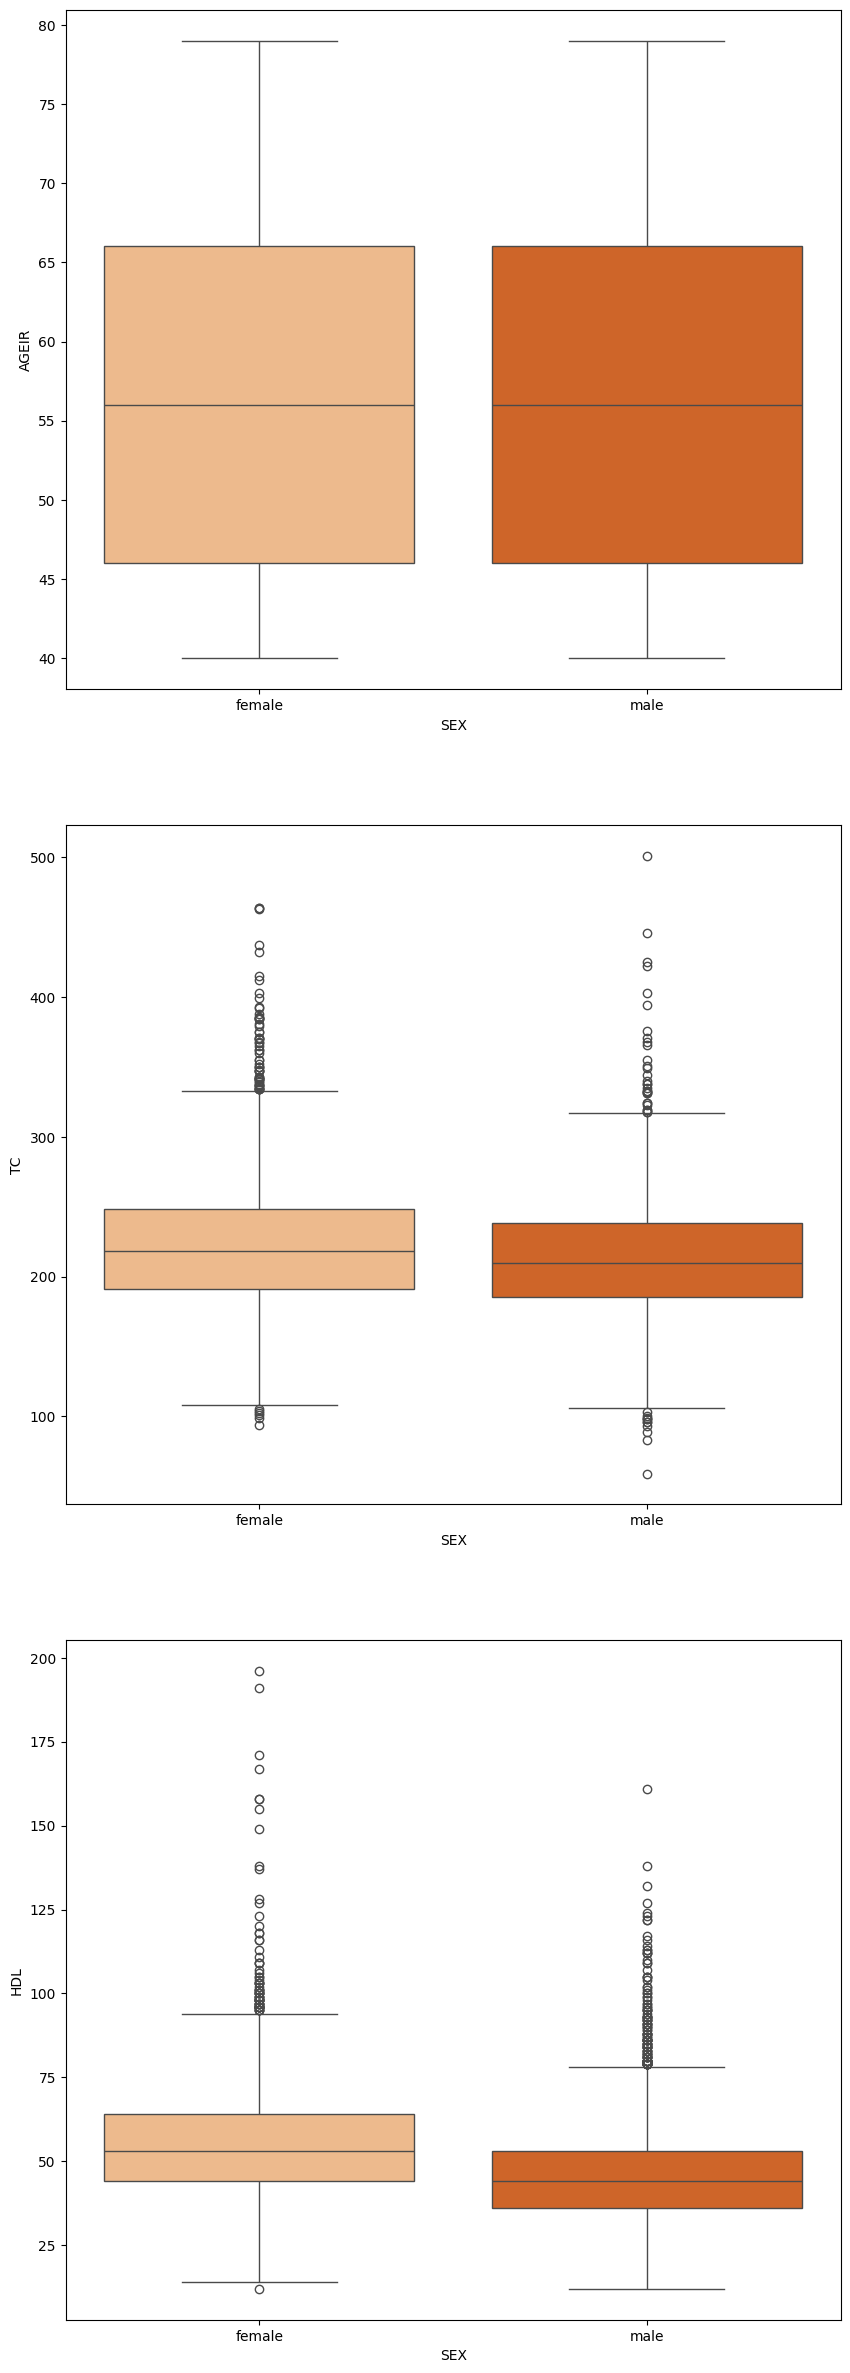

In [28]:
import seaborn as sb
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="AGEIR",x="SEX",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="TC",x="SEX",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="HDL",x="SEX",orient="v",ax=axes[2], palette="Oranges")

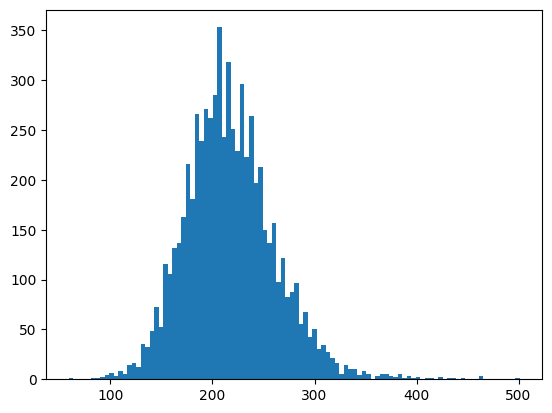

In [29]:
scaled_data = data[['TC']]  # 'TC' column eke aran histogram eka adala tynw
plt.hist(scaled_data,bins=100)
plt.show()

In [30]:
factor = 3
upper_lim = data['TC'].mean () + data['TC'].std () * factor
lower_lim = data['TC'].mean () - data['TC'].std () * factor

no_outliers = data[(data['TC'] < upper_lim) & (data['TC'] > lower_lim)]  # outliers nowana tika gnnw
no_outliers.head()

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48.0,236.0,66,no smoking,taking,no,1.1
1,male,48.0,260.0,51,no smoking,taking,yes,7.0
2,male,44.0,187.0,49,smoking,taking,no,7.0
3,female,42.0,216.0,57,smoking,taking,no,0.4
4,female,56.0,156.0,42,no smoking,taking,no,2.2


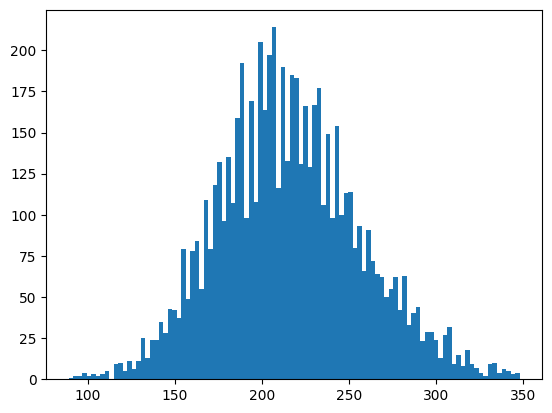

In [31]:
plt.hist(no_outliers['TC'],bins=100)
plt.show()

# Scaling

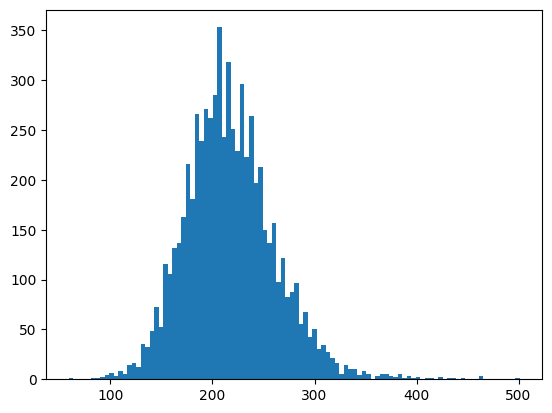

In [32]:
scaled_data = data[['TC']]
plt.hist(scaled_data,bins=100)
plt.show()

In [33]:
import numpy as np
                                 # calculate mean and sd
scaled_data = data[['TC']]

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 217.37466104248267
Standard Deviation: 43.79794522256045


Standard Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scaled_data = data[['TC']]
standard_scaler = StandardScaler()
transformed = standard_scaler.fit_transform(scaled_data[['TC']])

print('Mean:', transformed.mean())
print('Standard Deviation:', transformed.std())

Mean: 1.1550062531922158e-16
Standard Deviation: 1.0


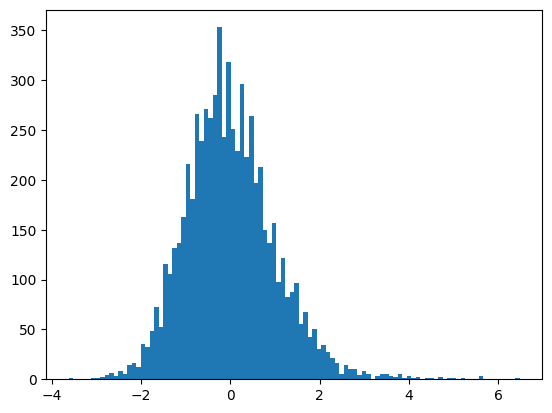

In [35]:
plt.hist(transformed,bins=100)
plt.show()

Min-Max Scaling (Normalization)

In [36]:
array=np.random.randint(40,120,20)
print(array)

[ 61  67 114  70 102  82  58 103  49  73 119  92  53 115  87  45  51  42
  93  48]


In [37]:
array_new=(array-40)/(120-40)
print(array_new)

[0.2625 0.3375 0.925  0.375  0.775  0.525  0.225  0.7875 0.1125 0.4125
 0.9875 0.65   0.1625 0.9375 0.5875 0.0625 0.1375 0.025  0.6625 0.1   ]


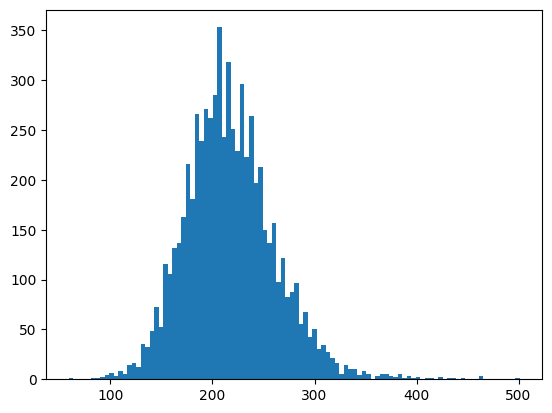

In [38]:
scaled_data = data[['TC']]

plt.hist(scaled_data,bins=100)
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
transformed = minmax_scaler.fit_transform(scaled_data[['TC']])

print('Mean:', transformed.mean())
print('Standard Deviation:', transformed.std())

Mean: 0.35831371276579793
Standard Deviation: 0.09908291639379489


In [40]:
min(transformed)
max(transformed)

array([1.])

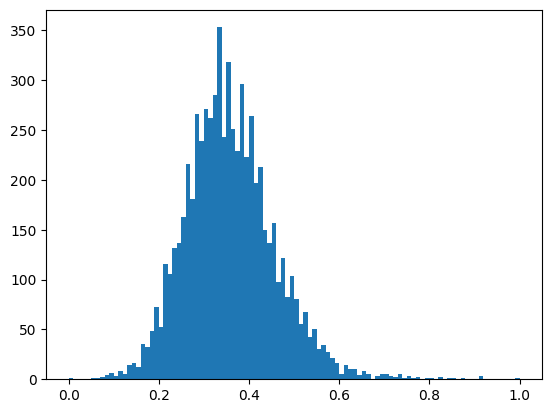

In [41]:
plt.hist(transformed,bins=100)
plt.show()

Quantile Transformation

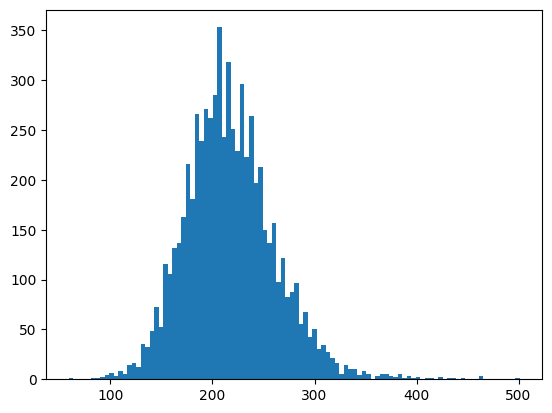

In [42]:
scaled_data = data[['TC']]

plt.hist(scaled_data,bins=100)
plt.show()

In [43]:
from sklearn.preprocessing import QuantileTransformer   #STANDED SCALER EKT ARAN UNIFORM DISTRIBUTION EKAK NUTH GNNW

qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
transformed = qtrans.fit_transform(scaled_data[['TC']])

print('Mean:', scaled_data['TC'].mean())
print('Standard Deviation:', scaled_data['TC'].std())

Mean: 217.37466104248267
Standard Deviation: 43.79794522256045


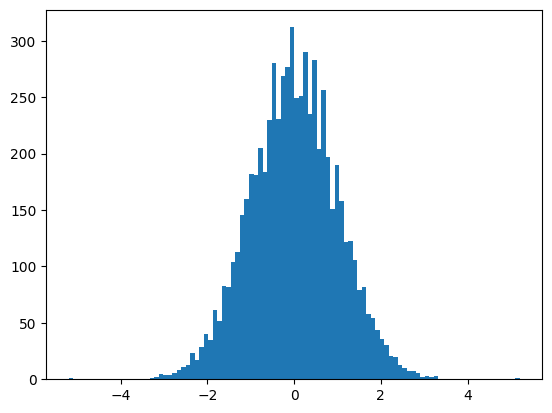

In [44]:
plt.hist(transformed,bins=100)
plt.show()